In [12]:
import torch
import torch.nn.functional as F
features = torch.rand((10, 2096))

labels = torch.cat([torch.arange(5) for i in range(2)], dim=0)
labels = (labels.unsqueeze(0) == labels.unsqueeze(1)).float()
features = F.normalize(features, dim=1)
similarity_matrix = torch.matmul(features, features.T)
mask = torch.eye(labels.shape[0], dtype=torch.bool)
labels = labels[~mask].view(labels.shape[0], -1)
similarity_matrix = similarity_matrix[~mask].view(similarity_matrix.shape[0], -1)
positives = similarity_matrix[labels.bool()].view(labels.shape[0], -1)

# select only the negatives the negatives
negatives = similarity_matrix[~labels.bool()].view(similarity_matrix.shape[0], -1)

logits = torch.cat([positives, negatives], dim=1)
labels = torch.zeros(logits.shape[0], dtype=torch.long)

logits = logits / 1

In [17]:
a = torch.randint(0, 10, (4,))
print(a)
a.repeat(2)

tensor([0, 3, 1, 0])


tensor([0, 3, 1, 0, 0, 3, 1, 0])

In [13]:
labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [15]:
logits.shape

torch.Size([10, 9])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


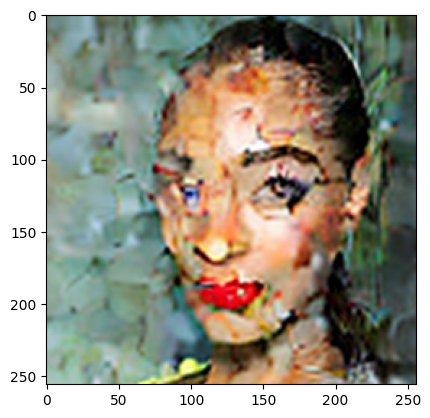

In [15]:
import tifffile
import matplotlib.pyplot as plt
image = tifffile.imread(
    '/mnt/hypercube/xiw136/local-refine-diffuser/results_new/10271152-gan_pipeline_end_to_end_groupt-celebahq256-DiT_Uncondition-B-4/samples/iter0/real/0149/00010.tiff'
    )
plt.imshow(image)

In [6]:
def sequence_t_indexes(start_t, end_t, interval, group=10):
    sequence = []
    for t in range(start_t, end_t+interval, interval):
        sequence.extend([i for i in range(t,t+group,1)])
    return sequence
sequence_t_indexes(0, 200, 40, 10)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209]

In [3]:
import torch
torch.ones((10,1)).shape

torch.Size([10, 1])

In [11]:
import random
a = [1,2,3,4,5]
random.choices(a,k=8)

[5, 2, 1, 4, 3, 2, 4, 2]

In [12]:
torch.randint(0,10, (5,))

tensor([5, 0, 0, 7, 6])

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim

# 定义一个简单的线性模型
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc = nn.Linear(1, 1)
        
    def forward(self, x):
        return self.fc(x)

# 定义一个用于计算perceptual loss的模型
class PerceptualModel(nn.Module):
    def __init__(self):
        super(PerceptualModel, self).__init__()
        self.fc = nn.Linear(1, 1)
        
    def forward(self, x):
        return self.fc(x)

# 初始化模型、优化器和损失函数
model = SimpleModel()
# 输出模型的权重，查看是否更新
print(model.fc.weight)
print(model.fc.bias)
perceptual_model = PerceptualModel()

# 禁止perceptual_model的梯度
for param in perceptual_model.parameters():
    param.requires_grad = False

optimizer = optim.SGD(model.parameters(), lr=0.01)
mse_loss = nn.MSELoss()

# 随机生成输入数据和目标数据
input_data = torch.randn(1, 1)
target_data = torch.randn(1, 1)

# 模型前向传播
output = model(input_data)

# 计算perceptual loss
with torch.no_grad():
    perceptual_target = perceptual_model(target_data)
    
perceptual_output = perceptual_model(output)
percept_loss = mse_loss(perceptual_output, perceptual_target)

# 清除之前的梯度
optimizer.zero_grad()

# 反向传播
percept_loss.backward()

# 更新模型权重
optimizer.step()

Parameter containing:
tensor([[0.0973]], requires_grad=True)
Parameter containing:
tensor([0.8781], requires_grad=True)


In [8]:
# 输出模型的权重，查看是否更新
print(model.fc.weight)
print(model.fc.bias)

Parameter containing:
tensor([[0.0973]], requires_grad=True)
Parameter containing:
tensor([0.8769], requires_grad=True)


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

# 定义一个简单的线性模型
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc = nn.Linear(1, 1)
        
    def forward(self, x):
        return self.fc(x)

# 初始化模型、优化器和损失函数
model = SimpleModel()
optimizer = optim.SGD(model.parameters(), lr=0.01)
mse_loss = nn.MSELoss()
# 输出模型的权重，查看是否更新
print(model.fc.weight)
print(model.fc.bias)
# 随机生成输入数据和目标数据
input_data = torch.randn(1, 1)
target_data = torch.randn(1, 1)

# 模型前向传播
output = model(input_data)

# 在torch.no_grad()块中计算feature_gt
with torch.no_grad():
    feature_gt = target_data * 2  # 仅为示例，假设这是某种特征计算

# 计算feature_pred，保留梯度
feature_pred = output * 2  # 同样，假设这是相同的特征计算

# 计算perceptual loss
percept_loss = mse_loss(feature_pred, feature_gt)

# 清除之前的梯度
optimizer.zero_grad()

# 反向传播
percept_loss.backward()

# 更新模型权重
optimizer.step()



Parameter containing:
tensor([[-0.1263]], requires_grad=True)
Parameter containing:
tensor([-0.9296], requires_grad=True)


In [2]:
# 输出模型的权重，查看是否更新
print(model.fc.weight)
print(model.fc.bias)

Parameter containing:
tensor([[-0.0035]], requires_grad=True)
Parameter containing:
tensor([-0.8035], requires_grad=True)


In [12]:
import torch
a = torch.rand((10,))
label = torch.randint(0,2,(10,))
pred = (a>0.5)
pred==label

tensor([False, False,  True,  True,  True, False,  True,  True, False, False])

In [14]:
label

tensor([1, 0, 1, 1, 1, 0, 1, 1, 1, 1])

In [15]:
pred

tensor([False,  True,  True,  True,  True,  True,  True,  True, False, False])

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim

# 定义两个简单的模型
class Model1(nn.Module):
    def __init__(self):
        super(Model1, self).__init__()
        self.fc = nn.Linear(10, 20)
    
    def forward(self, x):
        return self.fc(x)

class Model2(nn.Module):
    def __init__(self):
        super(Model2, self).__init__()
        self.fc = nn.Linear(20, 1)
    
    def forward(self, x):
        return self.fc(x)

# 初始化模型
model1 = Model1()
model2 = Model2()
print(model1.fc.weight)
print(model2.fc.weight)
# Freeze model2 的参数
for param in model2.parameters():
    param.requires_grad = False

# 定义一个 optimizer，只更新 model1 的参数
optimizer = optim.SGD(model1.parameters(), lr=0.01)

# 定义一个简单的 MSE 损失函数
criterion = nn.MSELoss()

# 假设有一个输入 x
x = torch.randn(5, 10)

# 前向传播
with torch.no_grad():
    output1 = model1(x)
    output2 = model2(output1)

# 假设有一个真实值 y
y = torch.randn(5, 1)

# 计算损失
loss = criterion(output2, y)

# 反向传播和优化
optimizer.zero_grad()  # 清零梯度
loss.backward()       # 反向传播
optimizer.step()      # 更新权重



Parameter containing:
tensor([[-0.3001,  0.2507,  0.1770, -0.2205,  0.1411, -0.0382, -0.2084,  0.1188,
         -0.0533, -0.2288],
        [-0.3069, -0.2779, -0.0698, -0.1304,  0.3103, -0.0201,  0.0798,  0.1344,
          0.0416, -0.1195],
        [-0.1786, -0.1580,  0.2398, -0.2756, -0.1192, -0.0206,  0.2473,  0.0413,
          0.2650,  0.1837],
        [-0.0597,  0.2295,  0.3060, -0.2590, -0.2046, -0.1866, -0.2412,  0.0331,
          0.3119, -0.2235],
        [-0.0506, -0.1381,  0.0542, -0.0958, -0.0932,  0.0154,  0.2696,  0.1752,
         -0.2684,  0.0215],
        [ 0.3026, -0.2587,  0.0016, -0.1438,  0.1651, -0.0681,  0.0839,  0.2432,
         -0.1765, -0.1108],
        [ 0.3157,  0.2369,  0.1457,  0.2568, -0.2170, -0.0757,  0.0222,  0.0300,
          0.0031, -0.0886],
        [ 0.2762,  0.1127,  0.2306, -0.2256,  0.2428, -0.1699, -0.1387,  0.2725,
         -0.2307,  0.0601],
        [-0.2361, -0.0095,  0.0692, -0.1337, -0.1287, -0.0134,  0.1957, -0.1599,
         -0.0174,  0.2582

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [3]:
# 打印模型的权重，检查哪些权重被更新了
print(model1.fc.weight)
print(model2.fc.weight)

Parameter containing:
tensor([[-0.1059, -0.1687,  0.1654,  0.0862,  0.3086,  0.1030,  0.2226,  0.1389,
         -0.1448,  0.1835],
        [-0.0654, -0.2848, -0.1539, -0.0796, -0.0512, -0.1110, -0.1926, -0.0325,
         -0.2719,  0.1595],
        [ 0.2773, -0.1716, -0.2722,  0.1274, -0.1064,  0.2028,  0.2630, -0.1313,
         -0.3014,  0.1592],
        [-0.1214,  0.0872,  0.0910,  0.1476,  0.2796,  0.0553, -0.0546,  0.1430,
         -0.1541,  0.2668],
        [-0.1883,  0.0279, -0.0774, -0.1069, -0.3066,  0.1778,  0.0770, -0.1453,
          0.0380,  0.0385],
        [-0.2758,  0.1297, -0.0166, -0.0668,  0.0954,  0.2124, -0.1986, -0.2641,
         -0.2224,  0.0362],
        [-0.0653, -0.0071, -0.0326, -0.2316,  0.1148,  0.0683, -0.1796, -0.1242,
         -0.1333, -0.0371],
        [-0.1482,  0.2516,  0.2422,  0.0424, -0.2702,  0.1894,  0.2933, -0.3118,
          0.2215, -0.2898],
        [ 0.0182,  0.1745, -0.1474, -0.1453,  0.2572,  0.1304, -0.0767, -0.1870,
          0.3161,  0.2617

In [6]:
import torch
ckpt = torch.load('../pretrained_models/256x256_diffusion_uncond.pt')

In [7]:
ckpt

OrderedDict([('time_embed.0.weight',
              tensor([[-3.4002e-05,  1.2700e-03,  5.0387e-05,  ..., -5.2761e-02,
                       -5.2933e-02,  1.1077e-02],
                      [ 7.2888e-04, -1.6580e-03, -8.2659e-06,  ..., -1.3887e-02,
                        6.8919e-02, -5.4822e-02],
                      [ 1.4848e-03,  8.8564e-04, -9.1123e-05,  ...,  7.6999e-03,
                        3.5076e-02, -6.0583e-02],
                      ...,
                      [-1.5025e-04,  7.9608e-04,  2.3511e-04,  ...,  2.3185e-02,
                       -4.0171e-02,  4.0501e-02],
                      [-2.5836e-03,  8.5561e-04, -1.4426e-03,  ...,  7.5668e-03,
                        3.4822e-02, -2.3473e-02],
                      [-5.4091e-04,  8.6625e-04,  1.4605e-03,  ...,  5.8638e-02,
                       -2.5257e-02, -5.9586e-02]], device='cuda:0', requires_grad=True)),
             ('time_embed.0.bias',
              tensor([-0.0348,  0.0299,  0.0628,  ..., -0.0186,  0.0092,  0

In [13]:
from torch.utils.data import DataLoader
from torch.utils.data.distributed import DistributedSampler
from torchvision.datasets import ImageFolder
from torchvision import transforms
from PIL import Image
import numpy as np

def center_crop_arr(pil_image, image_size):
    """
    Center cropping implementation from ADM.
    https://github.com/openai/guided-diffusion/blob/8fb3ad9197f16bbc40620447b2742e13458d2831/guided_diffusion/image_datasets.py#L126
    """
    while min(*pil_image.size) >= 2 * image_size:
        pil_image = pil_image.resize(
            tuple(x // 2 for x in pil_image.size), resample=Image.BOX
        )

    scale = image_size / min(*pil_image.size)
    pil_image = pil_image.resize(
        tuple(round(x * scale) for x in pil_image.size), resample=Image.BICUBIC
    )

    arr = np.array(pil_image)
    crop_y = (arr.shape[0] - image_size) // 2
    crop_x = (arr.shape[1] - image_size) // 2
    return Image.fromarray(arr[crop_y: crop_y + image_size, crop_x: crop_x + image_size])

# Setup data:
transform = transforms.Compose([
    transforms.Lambda(lambda pil_image: center_crop_arr(pil_image, 256)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5], inplace=True)
])

dataset = ImageFolder('../datasets/celebahq256/', transform=transform)

loader = DataLoader(
    dataset,
    batch_size=128,
    shuffle=False,
    num_workers=4,
    pin_memory=True,
    drop_last=True
)

for x, y in loader:
    break

In [15]:
x.shape

torch.Size([128, 3, 256, 256])

In [19]:
from diffusion import create_diffusion
import torch as th
diffusion = create_diffusion(str(1000))
t = th.tensor([500] * 128)
diffusion.q_sample(x, t).shape

torch.Size([128, 3, 256, 256])

In [1]:
import torch
torch.cuda.is_available()

True

In [2]:
torch.__version__

'2.1.0'

In [1]:
from model_structures.model_uncondition import DiT_Uncondition_models
from diffusion import create_diffusion

model = DiT_Uncondition_models["DiT_Uncondition-B/4"](
        input_size=32
    )
diffusion = create_diffusion(str(1000))

In [ ]:
list(range(10, 0))

: 

In [3]:
end_step = 5
list(range(end_step, 10))[::-1]

[9, 8, 7, 6, 5]

/home/AD/xiw136/anaconda3/envs/DiT/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from torchvision.datasets import ImageFolder
dataset = ImageFolder('../datasets/gan_data')
dataset

Dataset ImageFolder
    Number of datapoints: 60000
    Root location: ../datasets/gan_data

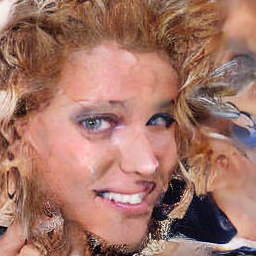

In [7]:
dataset[0][0]

In [8]:
import numpy as np
img = np.array(dataset[0][0])


In [9]:
img

array([[[199, 164, 150],
        [190, 167, 154],
        [197, 176, 170],
        ...,
        [166, 107,  80],
        [162, 104,  79],
        [153, 105,  80]],

       [[213, 179, 161],
        [223, 197, 188],
        [229, 209, 205],
        ...,
        [164, 107,  81],
        [158, 104,  79],
        [161, 107,  81]],

       [[235, 204, 187],
        [245, 221, 216],
        [243, 226, 224],
        ...,
        [166, 109,  83],
        [162, 107,  81],
        [162, 107,  81]],

       ...,

       [[218, 161, 154],
        [219, 163, 154],
        [216, 162, 147],
        ...,
        [ 19,  14,  25],
        [ 22,  18,  32],
        [ 14,  15,  31]],

       [[222, 165, 153],
        [215, 159, 147],
        [213, 158, 146],
        ...,
        [ 31,  25,  35],
        [ 11,   8,  32],
        [  6,  11,  29]],

       [[215, 164, 148],
        [215, 159, 142],
        [215, 160, 148],
        ...,
        [ 55,  51,  63],
        [ 51,  53,  72],
        [ 33,  39,  57]]

In [19]:
output1[-1].shape

torch.Size([10, 512, 2, 2])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


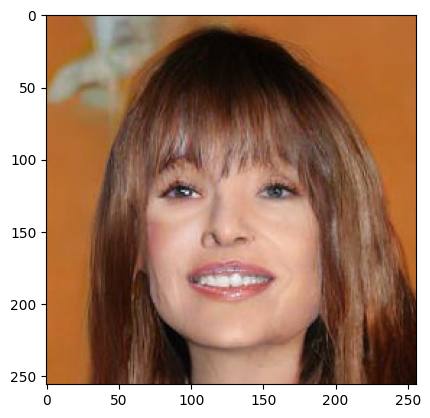

In [18]:
type(image)

numpy.ndarray

In [20]:
(np.clip(image,0, 1)<0).sum()

0

In [16]:
image.clip(0,1)

array([[[0.662717  , 0.5073192 , 0.39836612],
        [0.6855899 , 0.5145231 , 0.41780362],
        [0.438308  , 0.2882023 , 0.2213541 ],
        ...,
        [0.646137  , 0.45734003, 0.3662177 ],
        [0.6397576 , 0.44730878, 0.36427933],
        [0.6119024 , 0.44969344, 0.3703309 ]],

       [[0.6829843 , 0.5133467 , 0.40745685],
        [0.52879316, 0.35098368, 0.2680334 ],
        [0.4112371 , 0.24909455, 0.16762722],
        ...,
        [0.6486394 , 0.4612103 , 0.37015826],
        [0.6395737 , 0.45875952, 0.3687405 ],
        [0.6317495 , 0.44937977, 0.36815217]],

       [[0.49419624, 0.30197576, 0.22061875],
        [0.45042655, 0.277592  , 0.1856741 ],
        [0.45082158, 0.28006214, 0.19006288],
        ...,
        [0.6497837 , 0.45813498, 0.36912265],
        [0.6379533 , 0.45120534, 0.36035284],
        [0.6391066 , 0.4526485 , 0.36932614]],

       ...,

       [[0.8264804 , 0.58737504, 0.5538502 ],
        [0.83870846, 0.5982478 , 0.5576833 ],
        [0.8431252 , 0

In [5]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import LSUN
transform = transforms.Compose([transforms.ToTensor()])
data = LSUN(root='../datasets/LSUN', classes='cat', transform=transform)

ValueError: Unknown value '' for LSUN class. Valid values are {'bedroom', 'bridge', 'church_outdoor', 'classroom', 'conference_room', 'dining_room', 'kitchen', 'living_room', 'restaurant', 'tower'}.

In [8]:
import torch
import torch.nn as nn
from model_structures.conditional_resnet import ConditionResNet
net = ConditionResNet()
x = torch.rand((10, 4, 32, 32))
t = torch.ones((10))
output = net(x, t)

tensor([5.4030e-01, 7.3176e-01, 8.4601e-01, 9.1240e-01, 9.5042e-01, 9.7201e-01,
        9.8423e-01, 9.9112e-01, 9.9500e-01, 9.9719e-01, 9.9842e-01, 9.9911e-01,
        9.9950e-01, 9.9972e-01, 9.9984e-01, 9.9991e-01, 9.9995e-01, 9.9997e-01,
        9.9998e-01, 9.9999e-01, 9.9999e-01, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 8.4147e-01, 6.8156e-01, 5.3317e-01, 4.0931e-01,
        3.1098e-01, 2.3492e-01, 1.7689e-01, 1.3296e-01, 9.9833e-02, 7.4919e-02,
        5.6204e-02, 4.2157e-02, 3.1618e-02, 2.3712e-02, 1.7782e-02, 1.3335e-02,
        9.9998e-03, 7.4989e-03, 5.6234e-03, 4.2170e-03, 3.1623e-03, 2.3714e-03,
        1.7783e-03, 1.3335e-03, 1.0000e-03, 7.4989e-04, 5.6234e-04, 4.2170e-04,
        3.1623e-04, 2.3714e-04, 1.7783e-04, 1.3335e-04])
tensor([-1.2361e-01,  8.6625e-02,  5.0604e-02, -3.8535e-02,  1.2183e-01,
         3.2275e-03, -1.0736e-01, -3.1445e-01, -2.0244e-01,  8.5131e-0

In [4]:
output

tensor([[ 0.1250, -0.0322],
        [ 0.1207, -0.0484],
        [ 0.1014, -0.0390],
        [ 0.1019, -0.0257],
        [ 0.1406, -0.0139],
        [ 0.1144, -0.0285],
        [ 0.1042, -0.0131],
        [ 0.1379, -0.0195],
        [ 0.1155, -0.0405],
        [ 0.1227, -0.0211]], grad_fn=<AddmmBackward0>)

In [29]:
import torch
import torch.nn as nn
from model_structures.resnet import ResNet,extract_resnet_perceptual_outputs_v1,perceptual_loss_func
class SmallMLP(nn.Module):
    def __init__(self):
        super(SmallMLP, self).__init__()
        
        # 定义MLP的结构
        self.layers = nn.Sequential(
            nn.Linear(2048, 1),  # 第一层，将2048维度减少到1024维度
        )
        
    def forward(self, x):
        return self.layers(x)
    

def requires_grad(model, flag=True):
    """
    Set requires_grad flag for all parameters in a model.
    """
    for p in model.parameters():
        p.requires_grad = flag
mlp = SmallMLP()
requires_grad(mlp, False)

net = ResNet()
x1 = torch.rand((10, 4, 32, 32))
label = torch.rand((10, 1))
output = extract_resnet_perceptual_outputs_v1(net, x1)[-1]

output = mlp(output.flatten(start_dim=1))
loss_func = nn.MSELoss()
loss = loss_func(label, output)
loss.backward()
net.resnet.conv1.weight.grad

tensor([[[[ 0.0504, -0.9333,  1.6170],
          [-0.7399,  0.4631, -0.4713],
          [ 0.2960,  0.9112, -0.3409]],

         [[-0.4876,  0.0598, -0.3480],
          [-0.1134, -0.1783, -0.3767],
          [-0.6591,  0.5593,  1.6506]],

         [[-1.0198,  0.6616,  0.5727],
          [ 1.4633, -0.4668, -1.3136],
          [-0.1854,  0.4739, -0.7715]],

         [[ 0.0182,  0.1970,  1.8792],
          [ 0.6071,  1.4552,  0.9557],
          [ 0.1469, -0.0166,  0.1209]]],


        [[[ 0.3822,  0.6556,  0.8537],
          [ 0.6682,  0.5090,  0.6793],
          [ 0.7775, -0.8715, -0.2264]],

         [[ 0.4728, -0.7568,  1.5128],
          [-0.2991,  0.2532, -0.3489],
          [ 0.0751, -1.5088, -0.7012]],

         [[-0.1579,  1.5727,  0.3669],
          [ 1.3960,  0.3813,  1.3082],
          [ 0.3051,  0.3451, -0.0521]],

         [[ 1.1061,  0.4520,  1.0856],
          [ 0.9537,  0.0247, -0.7539],
          [ 0.8855,  1.1548,  0.2197]]],


        [[[ 0.0000,  0.0000,  0.0000],
     

In [17]:
import torch
import torch.nn as nn
from model_structures.resnet import ResNet,extract_resnet_perceptual_outputs_v1,perceptual_loss_func


net = ResNet()
def requires_grad(model, flag=True):
    """
    Set requires_grad flag for all parameters in a model.
    """
    for p in model.parameters():
        p.requires_grad = flag
requires_grad(net.resnet.layer1, False)

x1 = torch.rand((10, 4, 32, 32))
output1 =  extract_resnet_perceptual_outputs_v1(net, x1)
x2 = torch.rand((10, 4, 32, 32))
output2 =  extract_resnet_perceptual_outputs_v1(net, x2)

loss_func = nn.MSELoss()
loss = perceptual_loss_func(loss_func, output1, output2)
print(loss)
loss.backward()
net.resnet.conv1.weight.grad

tensor(3.7801)


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [4]:
loss

tensor(0., grad_fn=<AddBackward0>)

In [2]:
net

ResNet(
  (resnet): ResNet(
    (conv1): Conv2d(4, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runni

In [3]:
for x in output:
    print(x.shape)

torch.Size([10, 64, 16, 16])
torch.Size([10, 64, 16, 16])
torch.Size([10, 128, 8, 8])
torch.Size([10, 256, 4, 4])
torch.Size([10, 512, 2, 2])


In [8]:
x.mean(axis=0).shape

torch.Size([512, 2, 2])

In [1]:
import torch
import torch.nn as nn
from model_structures import resnet, discriminator
net = resnet.ResNet()
net = discriminator.Pretrained_ResNet_Discriminator(net)
x1 = torch.rand((10, 4, 32, 32))
y1 = net(x1)
y1.shape

AttributeError: 'ResNet' object has no attribute 'fc'

In [12]:
y1

tensor([[1.6720, 1.3306, 0.9475,  ..., 0.0000, 0.7648, 1.0346],
        [0.8868, 0.0000, 1.3646,  ..., 0.0000, 0.0000, 0.0000],
        [3.6659, 3.7026, 2.7838,  ..., 0.5543, 1.5178, 1.3130],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0263, 0.0499, 0.0790],
        [0.7808, 0.2304, 0.8533,  ..., 3.9753, 3.9743, 4.2762],
        [1.5862, 1.9369, 0.2653,  ..., 0.8254, 3.2477, 1.6207]],
       grad_fn=<ReshapeAliasBackward0>)

In [19]:
output = ((y1-y2)**2)

In [20]:
output.mean(dim=list(range(1, len(output.shape)))).shape

torch.Size([10])

In [21]:
a = torch.rand((10, 2048))
d = torch.rand(10)
d.mean(), a.mean()

(tensor(0.5659), tensor(0.5029))

In [22]:
d.mean() + 0.2*a.mean()

tensor(0.6664)

In [24]:
(d+0.2*a.mean(dim=-1)).mean()

tensor(0.6664)

In [1]:
import torch.nn as nn
import torchvision.models as models

class ResNet(nn.Module):
    def __init__(self, resolution=32,  num_classes=1000):
        super(ResNet, self).__init__()
        self.resolution = resolution
        self.resnet = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
        self.resnet.conv1 = nn.Conv2d(4, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        if num_classes != 1000:
            self.resnet.fc = nn.Linear(self.resnet.fc.in_features, num_classes)
    
    def forward(self, x):
        return self.resnet(x)
    
net = ResNet(num_classes=2)

In [2]:
net

ResNet(
  (resnet): ResNet(
    (conv1): Conv2d(4, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runni

In [5]:
from diffusers.models.resnet import ResnetBlock2D
from diffusers.models.embeddings import TimestepEmbedding
import torch 
import torch.nn as nn
class ResNetDiscriminator(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(4, 64, kernel_size=7, stride=2, padding=3)
        temb_channels = 256
        self.time_embedding = TimestepEmbedding(timestep_input_dim, time_embed_dim)
        self.block1 = ResnetBlock2D(in_channels=64, out_channels=128, temb_channels=temb_channels, time_embedding_norm = 'scale_shift')
        self.block2 = ResnetBlock2D(in_channels=128, out_channels=256, temb_channels=temb_channels, time_embedding_norm = 'scale_shift')
        self.block3 = ResnetBlock2D(in_channels=256, out_channels=512, temb_channels=temb_channels, time_embedding_norm = 'scale_shift')
        
        self.avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, 1)
        
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x, t):
        x = self.conv1(x)
        
        x = self.block1(x, t)
        x = self.block2(x, t)
        x = self.block3(x, t)
        
        x = self.avg_pool(x)
        
        x = torch.flatten(x, 1)
        x = self.fc(x)
        
        x = self.sigmoid(x)
        
        return x

discriminator = ResNetDiscriminator()

x = torch.randn(64, 4, 32, 32)
t = torch.randn(16)

output = discriminator(x, t)
print(output)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x16 and 128x256)

In [7]:

import torch 
import torch.nn as nn
from diffusers.models.resnet import ResnetBlock2D
from diffusers.models.embeddings import TimestepEmbedding, Timesteps

class ResNetDiscriminator(nn.Module):
    def __init__(
        self,
        input_size = 32,
        in_channels = 4,
        block_output_channels = (64, 128, 256, 512),
        class_num = 1,
        ):
        super().__init__()
        self.input_size = input_size
        self.class_num = class_num
        
        time_embed_dim = block_output_channels[0] * 4
        timestep_input_dim = block_output_channels[0]
        
        self.time_proj = Timesteps(block_output_channels[0], flip_sin_to_cos=True, downscale_freq_shift=0)
        self.time_embedding = TimestepEmbedding(timestep_input_dim, time_embed_dim)
        
        self.conv1 = nn.Conv2d(in_channels, block_output_channels[0], kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
        
        self.layer1 = ResnetBlock2D(in_channels=block_output_channels[0], 
                                    out_channels=block_output_channels[0], 
                                    temb_channels=time_embed_dim, 
                                    time_embedding_norm = 'scale_shift')
        self.layer2 = ResnetBlock2D(in_channels=block_output_channels[0], 
                                    out_channels=block_output_channels[1], 
                                    temb_channels=time_embed_dim, 
                                    time_embedding_norm = 'scale_shift')
        self.layer3 = ResnetBlock2D(in_channels=block_output_channels[1], 
                                    out_channels=block_output_channels[2], 
                                    temb_channels=time_embed_dim, 
                                    time_embedding_norm = 'scale_shift')
        self.layer4 = ResnetBlock2D(in_channels=block_output_channels[2], 
                                    out_channels=block_output_channels[3], 
                                    temb_channels=time_embed_dim, 
                                    time_embedding_norm = 'scale_shift')
        
        self.avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        
        self.fc = nn.Linear(block_output_channels[3], class_num)
        
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x, t):
        t = t * torch.ones(x.shape[0], dtype=t.dtype, device=t.device)
        t_emb = self.time_proj(t)
        emb = self.time_embedding(t_emb)
        
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.maxpool(x)
        
        x = self.layer1(x, emb)
        x = self.layer2(x, emb)
        x = self.layer3(x, emb)
        x = self.layer4(x, emb)
        
        x = self.avg_pool(x)
        
        x = torch.flatten(x, 1)
        x = self.fc(x)
        
        if self.class_num == 1:
            x = self.sigmoid(x)
        return x

# Initialize the discriminator
discriminator = ResNetDiscriminator()

x = torch.randn(64, 4, 32, 32)
t = torch.randn(64)

# Forward Pass
output = discriminator(x, t)
print(output.shape)

torch.Size([64, 1])
